
## EE 342:  Lab 1 - Elementary Music Synthesis


**Overview**
The purpose of this lab is to familiarize you with constructing and processing discrete-time sound signals. You will learn how to synthesize music notes and play them. You will concatenate a series of music notes into a small music piece, add volume variation to the music piece, overlap the adjacent notes to further make the music smoother and more realistic.

Through this process, you will learn to perform the following sound synthesis tasks:
- Generating musical notes
- Improving the quality of the generated sound
- Overlapping notes

**Team Members**: Brinda Moudgalya, Prannav Jayashanker

In [1]:
import numpy as np
import IPython.display as ipd
# Usage:
# ipd.Audio(audio_array, rate=sampling_rate, autoplay=True)
import matplotlib.pyplot as plt

In [2]:
# SimpleAudio constants.
DEFAULT_SAMPLE_RATE = 8000
DEFAULT_AMPLITUDE = 1
DEFAULT_BYTES_PER_SAMPLE = 2
DEFAULT_NUM_CHANNELS = 1

# Musical note frequencies.
A = 220.0
B = A * 2 ** (2 / 12)
C = A * 2 ** (3 / 12)
E = A * 2 ** (7 / 12)

In [ ]:
def play(data, num_channels=DEFAULT_NUM_CHANNELS, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE,
         sample_rate=DEFAULT_SAMPLE_RATE):
    """Returns a playable audio object

    Args:
        data: The audio data to be played (as a NumPy array).
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    # Enter code here
    return ipd.Audio(data, rate=sample_rate, autoplay=True)
    

def display_envelope(signal,duration=-1,sample_rate=DEFAULT_SAMPLE_RATE,bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE):

    """
    Plots the envelope of a duration of the generated audio. 

    Args:
        signal: The audio signal to be displayed (as a NumPy array).
        duration: The length of hte signal to be displayed. -1 to display entire signal.
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    
    from scipy.signal import hilbert
    
    if duration < 0:
        duration = len(signal)/sample_rate
    
    n = int(duration*sample_rate)
    
    analytic_signal = hilbert(signal[0:n])
    amplitude_envelope = np.abs(analytic_signal)
        
    t = np.linspace(0,duration,len(amplitude_envelope))
    
    plt.figure()    
    plt.plot(t,amplitude_envelope)
    plt.show()

## Task 1: Generating Musical Notes

In [ ]:
# defining note function 
def note(frequency, duration, amplitude=DEFAULT_AMPLITUDE, sample_rate=DEFAULT_SAMPLE_RATE):
    """Generates samples of a musical note.

    Samples are generated according to following equation:

        y(t) = A sin(wt)

    Args:
        frequency: The frequency of the note.
        duration: The length of the note in seconds.
        amplitude: The amplitude of the note.
        sample_rate: The sample rate.

    Returns:
        An array of samples representing the note.
    """
    # Enter code here
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = amplitude * np.sin(2 * np.pi * frequency * t)
    
    return y

In [20]:
# Use your function to generate the musical score for the Scarborough Fair.
sf_notes = [
    (A, 1),
    (A, 0.5),
    (E, 0.5),
    (E, 0.5),
    (E, 0.5),
    (B, 0.5),
    (C, 0.5),
    (B, 0.5),
    (A, 2),
]

scarb_fair_notes = []

for freq, dur in sf_notes:
    scarb_fair_notes.append(note(freq, dur, DEFAULT_AMPLITUDE, DEFAULT_SAMPLE_RATE))

# Play the audio sample
scarborough_fair = np.concatenate (scarb_fair_notes)

play(scarborough_fair)

## Task 2: Volume Variations

In [21]:
# Volume Variation Function Attack, Decay, Sustain and Release (ADSR)
def adsr(note):
    """Generates an ADSR envelope and applies it to a note.

        A: Linear increase to 60% amplitude over 20% length.
        D: Linear decrease to 50% amplitude over 4% length.
        S: Constant 50% amplitude over 40% length.
        R: Linear decrease to 0% amplitude over 36% length.

     Args:
        note: The note to be modified.

    Returns:
        A note that has been scaled by the ADSR envelope.
    """
    N = len(note)

    # Segment lengths
    A_len = int(0.20 * N)
    D_len = int(0.04 * N)
    S_len = int(0.40 * N)
    R_len = N - (A_len + D_len + S_len)

    # ADSR segments
    attack  = np.linspace(0, 0.6, A_len, endpoint=False)
    decay   = np.linspace(0.6, 0.5, D_len, endpoint=False)
    sustain = np.ones(S_len) * 0.5
    release = np.linspace(0.5, 0, R_len)

    # Full envelope
    envelope = np.concatenate([attack, decay, sustain, release])

    return note * envelope


    

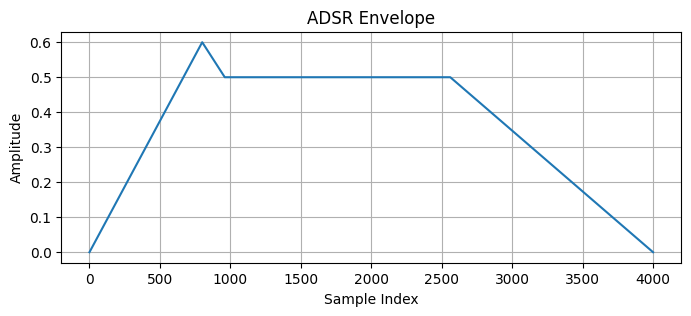

In [ ]:
# Use your function Apply an ADSR envelope to each note.
adsr_notes = [adsr(n) for n in sf_notes]



# Play the audio sample
song_adsr = np.concatenate(adsr_notes)
song_adsr /= np.max(np.abs(song_adsr))  # normalize

play(song_adsr)


# Display the envelope
test_note = np.ones(4000)
env = adsr(test_note)

plt.figure(figsize=(8,3))
plt.plot(env)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("ADSR Envelope")
plt.grid(True)
plt.show()


**Supplementary Questions:** Instead of enveloping with the ADSR function, how would you envelope with a decaying exponential?

## Task 3: Overlapping Notes

In [8]:
def overlap(notes, offset):
    """Joins notes together with overlap between consecutive notes.

    Args:
        notes: An array of notes to be joined.
        offset: The amount of allowable overlap between consecutive notes.

    Returns:
        A score made from the input notes.
    """
    # Enter code here

In [18]:
# Smooth the sound by overlapping the notes.


# Play the audio sample


# Display the envelope

## Task 4: Additive Synthesis

In [ ]:
def complex_note(frequency, duration, amplitude=DEFAULT_AMPLITUDE, sample_rate=DEFAULT_SAMPLE_RATE):
    """Synthesizes a complex sound by summing multiple sine waves (additive synthesis).

    Parameters:
    frequencies (list of floats): A list of frequencies (Hz) to include in the chord.
                                  Example: [440, 554.37, 659.25]
    duration (float): The duration of the sound in seconds.
    sampling_rate (int): The sampling frequency in Hz (default 8000).
    
    Returns:
    np.array: A numpy array containing the normalized, summed audio samples.
    """
    # Enter code here